#4.Distribución de intensidades de una imagen.

Para una imagen con  valores de intensidad entre 0 y 255, la distribución de intensidades se refiere al número de veces que se repite cada valor en la imagen.

por otro lado, la ecualización de histograma es una transformación que redistribuye las intensidades. Se utiliza para ampliar el rango dinámico, lograr una distribución más uniforme y aumentar el contraste global de la imagen. Se define como:

𝐼eq(𝑥,𝑦)=(𝐿-1)×CDF(𝐼(𝑥,𝑦))


donde,L es el número de niveles de intensidad (256 para 8 bits),CDF es la función de distribución acumulada, I(x,y) la imagen original.

##4.1 Importar librerías

In [ ]:
!pip install opencv-python matplotlib numpy PIL pathlib

In [1]:
#Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os
import cv2

##4.2 Cargar las imágenes

In [ ]:
def guardar(img_array, nombre_archivo,ruta_resultados=results_dir):
  """ Se define una función para guardar las imágenes"""
  img_array.save(os.path.join(ruta_resultados, nombre_archivo))
  print(f"Imagen guardada en: {(os.path.join(ruta_resultados, nombre_archivo))}")


In [12]:
#Asigna las rutas: 1. Cargar las imágenes 2. Guardar los resultados
project_dir = "/content/drive/MyDrive/UNAL/Visión por computador/TareasDigiVision/Proyecto1"
image_folder = os.path.join(project_dir, "img", "2.transformaciones y distribución de intensidad")
results_dir= os.path.join(project_dir, "results", "4.distribuciónIntensidad")

In [4]:
# Carga las imágenes de las fachadas en escala de gris
fachada_am = cv2.imread((os.path.join(image_folder, "fachada_am.jpg")), cv2.IMREAD_GRAYSCALE)
fachada_pm =  cv2.imread((os.path.join(image_folder, "fachada_pm.jpg")), cv2.IMREAD_GRAYSCALE)

##4.3 Determinación del histograma

In [5]:
# Calcular histograma (256 niveles de gris)
"""# convierte la imagen en un arreglo 1D, luego utilizando la función
np.histogram se determina para cada intensidad [0,255] la frecuencia.
hist es un arreglo de longitud 256 donde cada posición representa la frecuencia"""

hist_am, bins_am = np.histogram(fachada_am.flatten(), 256, [0,256])
hist_pm, bins_pm = np.histogram(fachada_pm.flatten(), 256, [0,256])


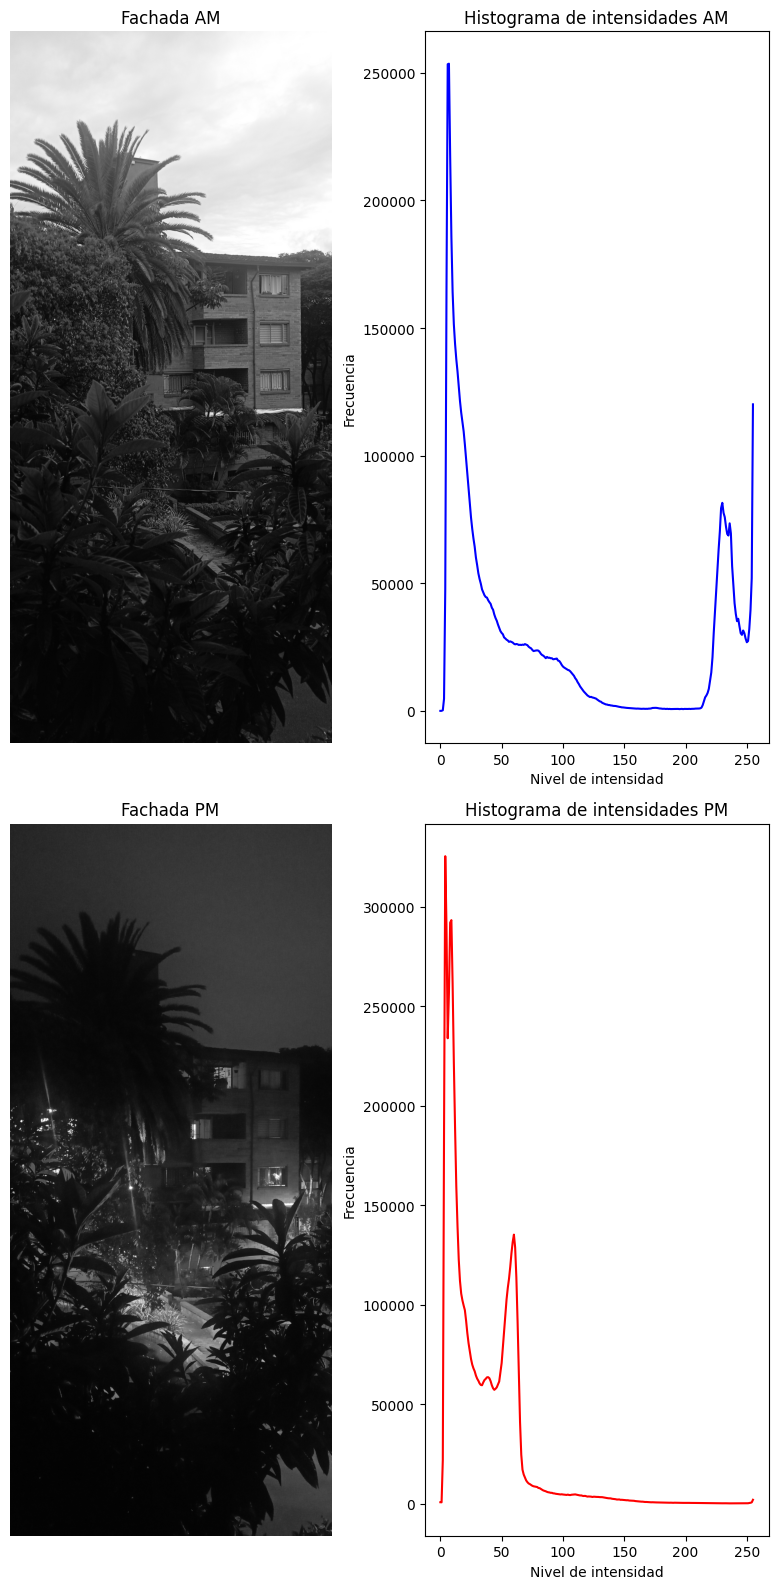

In [14]:
#Muestran las imágenes y sus histogramas
fig, axs = plt.subplots(2, 2,figsize=(8, 16))

axs[0,0].imshow(fachada_am, cmap="gray")
axs[0,0].set_title("Fachada AM")
axs[0,0].axis("off")

axs[0,1].plot(bins_am[:-1], hist_am, color='blue')
axs[0,1].set_title("Histograma de intensidades AM")
axs[0,1].set_xlabel("Nivel de intensidad")
axs[0,1].set_ylabel("Frecuencia")

axs[1,0].imshow(fachada_pm, cmap="gray")
axs[1,0].set_title("Fachada PM")
axs[1,0].axis("off")

axs[1,1].plot(bins_pm[:-1], hist_pm, color='red')
axs[1,1].set_title("Histograma de intensidades PM")
axs[1,1].set_xlabel("Nivel de intensidad")
axs[1,1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

ruta_guardado = os.path.join(results_dir, "histogramas.png")
fig.savefig(ruta_guardado, dpi=500, bbox_inches='tight')
plt.close(fig)

En la imagen de la fachada AM el histograma está más distribuido en todo el rango, aunque tiene un pico en valores bajos.

En la imagen de la fachada PM el histograma está más concentrado en valores bajos, esto representa una imagen más oscura.

##4.4 Calculo de la función de distribución acumulada y equalización del histograma

In [7]:
def CDF(hist):
  cdf=hist.cumsum()
  # Normalizar la CDF entre 0 y 255
  cdf_min = cdf[cdf > 0].min()
  cdf_eq = (cdf - cdf_min) * 255 / (cdf[-1] - cdf_min)
  cdf_eq = np.clip(cdf_eq, 0, 255)

  return cdf_eq

In [8]:
#Se Determina la CDF normalizada
cdf_am= CDF(hist_am)
cdf_pm=CDF(hist_pm)

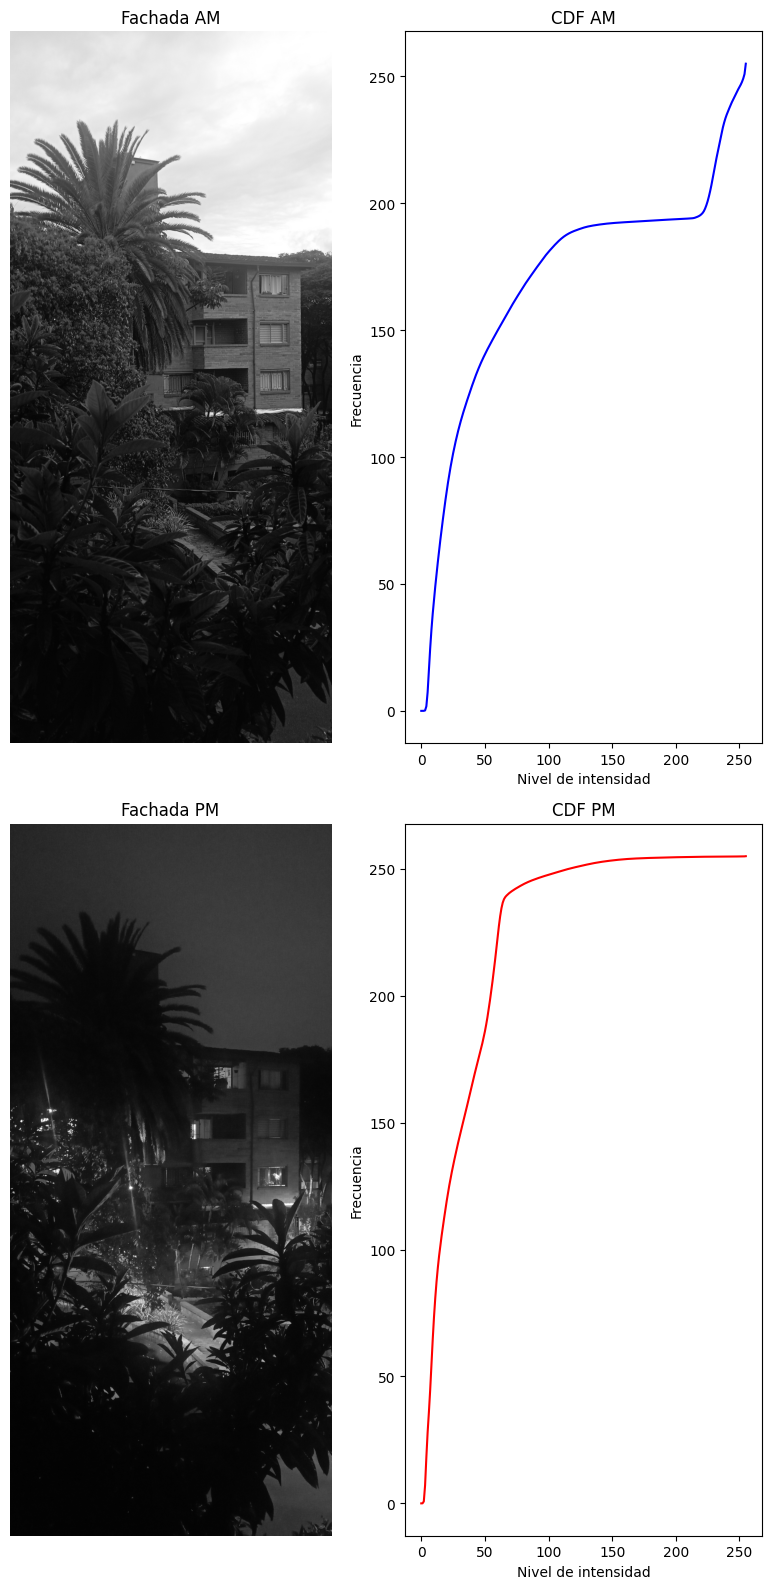

In [15]:
#Muestran las imágenes y sus CDF
fig, axs = plt.subplots(2, 2,figsize=(8, 16))

axs[0,0].imshow(fachada_am, cmap="gray")
axs[0,0].set_title("Fachada AM")
axs[0,0].axis("off")

axs[0,1].plot(bins_am[:-1], cdf_am, color='blue')
axs[0,1].set_title("CDF AM")
axs[0,1].set_xlabel("Nivel de intensidad")
axs[0,1].set_ylabel("Frecuencia")

axs[1,0].imshow(fachada_pm, cmap="gray")
axs[1,0].set_title("Fachada PM")
axs[1,0].axis("off")

axs[1,1].plot(bins_pm[:-1], cdf_pm, color='red')
axs[1,1].set_title("CDF PM")
axs[1,1].set_xlabel("Nivel de intensidad")
axs[1,1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

ruta_guardado = os.path.join(results_dir, "CDF Normalizada.png")
fig.savefig(ruta_guardado, dpi=500, bbox_inches='tight')
plt.close(fig)

In [10]:
#Se realiza la equalización de las imágenes
#Se toma cada valor de img_original y se usa como índice en cdf_eq,
#se reemplaza por el número que encuentra en cdf_eq.

img_eq_am = cdf_am[fachada_am.astype(np.uint8)]
img_eq_pm = cdf_pm[fachada_pm.astype(np.uint8)]


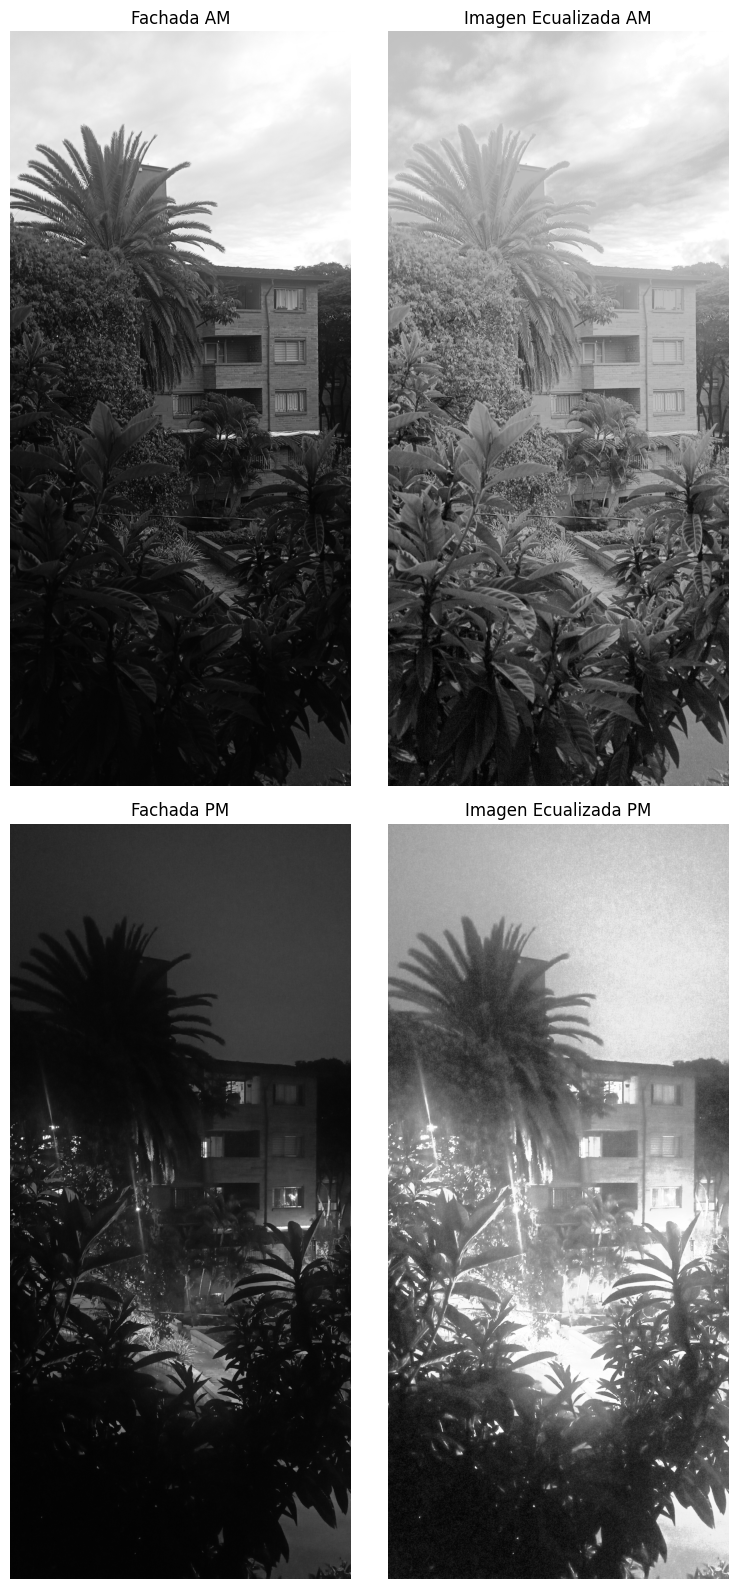

In [16]:
fig, axs = plt.subplots(2, 2,figsize=(8, 16))

axs[0,0].imshow(fachada_am, cmap="gray")
axs[0,0].set_title("Fachada AM")
axs[0,0].axis("off")

axs[0,1].imshow(img_eq_am, cmap='gray')
axs[0,1].set_title("Imagen Ecualizada AM")
axs[0,1].axis("off")

axs[1,0].imshow(fachada_pm, cmap="gray")
axs[1,0].set_title("Fachada PM")
axs[1,0].axis("off")

axs[1,1].imshow(img_eq_pm, cmap='gray')
axs[1,1].set_title("Imagen Ecualizada PM")
axs[1,1].axis("off")

plt.tight_layout()
plt.show()

ruta_guardado = os.path.join(results_dir, "ImágenesEcualizadas.png")
fig.savefig(ruta_guardado, dpi=500, bbox_inches='tight')
plt.close(fig)

En la imagen AM, la distribución de intensidades ya era amplia y la transformación de ecualización fue más suave, con cambios leves en los niveles de intensidad y un incremento moderado del contraste.

Por otro lado, en la imagen PM, el histograma estaba concentrado en intensidades bajas, la CDF extendió significativamente estos valores hacia todo el rango dinámico, generando un aumento fuerte del contraste.

la CDF en el caso AM al aumento fue más constante con una pequeña meseta ~ 100 y 200 y un aumento casi lineal al final, mientras que en el caso PM se evidenció un cambio más pronunciado al inicio y una meseta ~ desde 100, lo que evidencia un aumento de intensidades en las zonas más oscuras de la imagen.